In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


# Understanding Japan

## 1 - Processing the Japan Bonds


In [10]:
df_bond_jgb = pd.read_csv('../Data/Japan/1_Markets/markets_historical_gjgb10_ind.csv', encoding='utf-16')

df_bond_jgb['Date'] = pd.to_datetime(df_bond_jgb['Date'], format='%d/%m/%Y')
df_bond_jgb.set_index(['Date'], inplace=True)
df_bond_jgb.sort_index(ascending=True)


,Symbol,Open,High,Low,Close
Date,,,,,
1984-01-04,GJGB10:IND,7.410,7.410,7.410,7.410
1984-02-10,GJGB10:IND,7.430,7.430,7.430,7.430
1984-02-15,GJGB10:IND,7.430,7.430,7.430,7.430
1984-02-21,GJGB10:IND,7.450,7.450,7.450,7.450
1984-03-16,GJGB10:IND,7.300,7.300,7.300,7.300
...,...,...,...,...,...
2023-07-26,GJGB10:IND,0.467,0.472,0.447,0.449
2023-07-27,GJGB10:IND,0.464,0.465,0.436,0.441
2023-07-28,GJGB10:IND,0.516,0.579,0.501,0.556


## Plotting the Japan Bonds

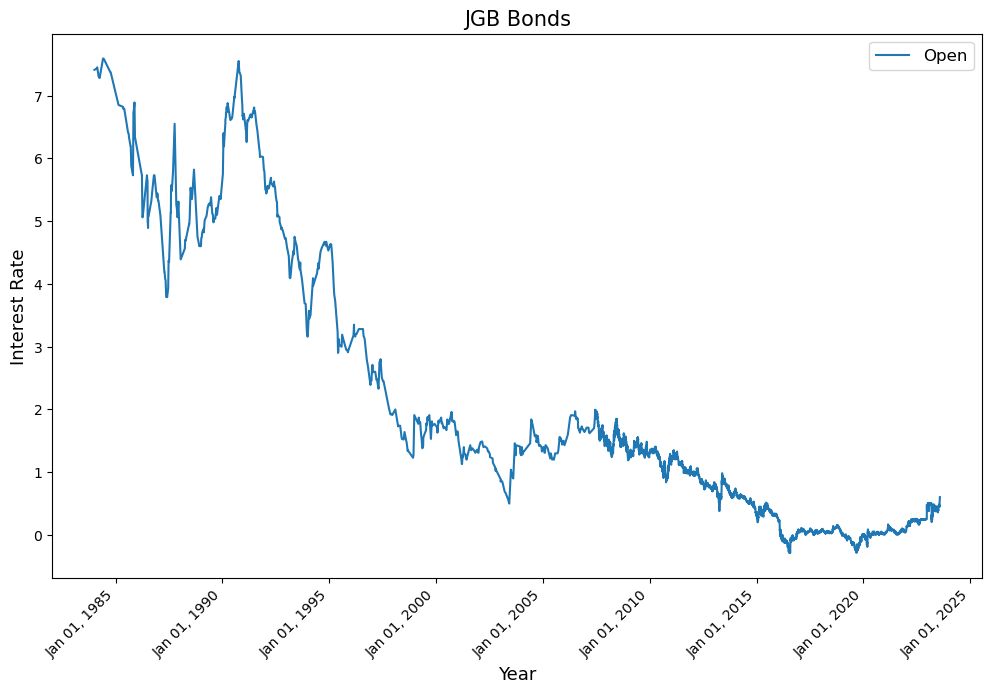

In [17]:
df_bond_jgb.Open.plot(figsize = (12,8))
plt.title("JGB Bonds", fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Interest Rate", fontsize = 13)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))

## 2 - Processing the JGB IR

In [18]:
df_shares_index_nikkei = pd.read_csv('../Data/Japan/1_Markets/markets_historical_nky_ind.csv', encoding='utf-16')

df_shares_index_nikkei['Date'] = pd.to_datetime(df_shares_index_nikkei['Date'], format='%d/%m/%Y')
df_shares_index_nikkei.set_index(['Date'], inplace=True)
df_shares_index_nikkei.sort_index(ascending=True)

,Symbol,Open,High,Low,Close
Date,,,,,
1983-06-07,NKY:IND,8475.30,8475.30,8475.30,8475.30
1983-06-08,NKY:IND,8445.45,8445.45,8445.45,8445.45
1983-06-09,NKY:IND,8468.12,8468.12,8468.12,8468.12
1983-06-10,NKY:IND,8500.48,8500.48,8500.48,8500.48
1983-06-13,NKY:IND,8598.65,8598.65,8598.65,8598.65
...,...,...,...,...,...
2023-07-26,NKY:IND,32704.96,32724.25,32488.52,32668.34
2023-07-27,NKY:IND,32523.69,32938.59,32503.69,32891.16
2023-07-28,NKY:IND,32444.42,32846.97,32037.55,32759.23


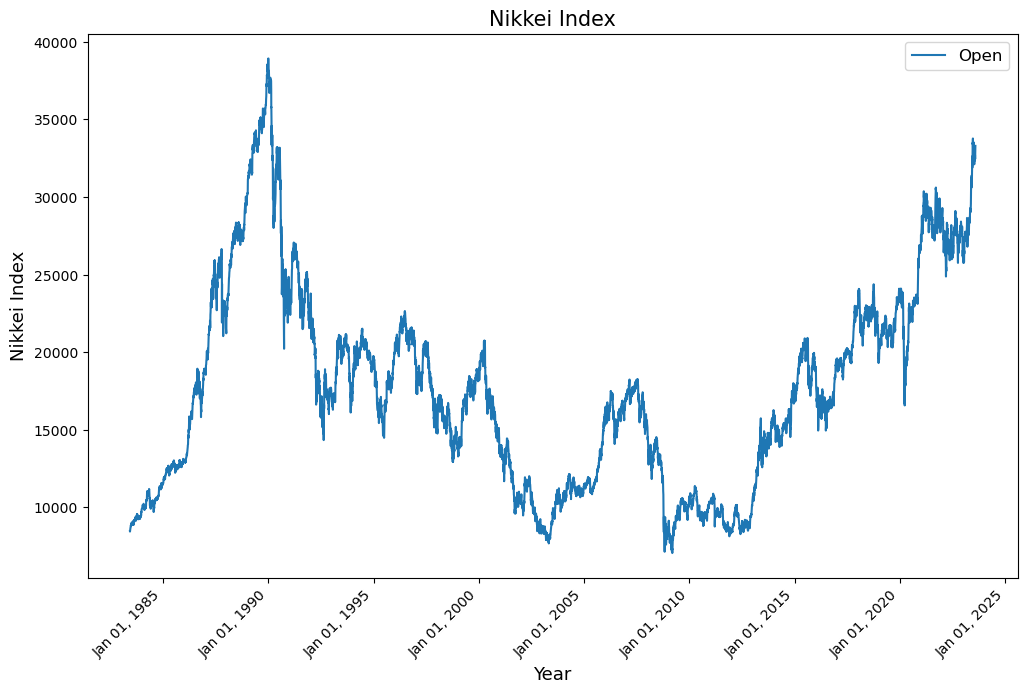

In [20]:
df_shares_index_nikkei.Open.plot(figsize = (12,8))
plt.title("Nikkei Index", fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Nikkei Index", fontsize = 13)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))

In [21]:
cdf = pd.concat([df_bond_jgb, df_shares_index_nikkei], ignore_index=False)
cdf.sort_index(ascending=True)



,Symbol,Open,High,Low,Close
Date,,,,,
1983-06-07,NKY:IND,8475.300,8475.300,8475.300,8475.300
1983-06-08,NKY:IND,8445.450,8445.450,8445.450,8445.450
1983-06-09,NKY:IND,8468.120,8468.120,8468.120,8468.120
1983-06-10,NKY:IND,8500.480,8500.480,8500.480,8500.480
1983-06-13,NKY:IND,8598.650,8598.650,8598.650,8598.650
...,...,...,...,...,...
2023-07-28,NKY:IND,32444.420,32846.970,32037.550,32759.230
2023-07-31,GJGB10:IND,0.573,0.612,0.573,0.604
2023-07-31,NKY:IND,33128.830,33402.080,33025.930,33172.220


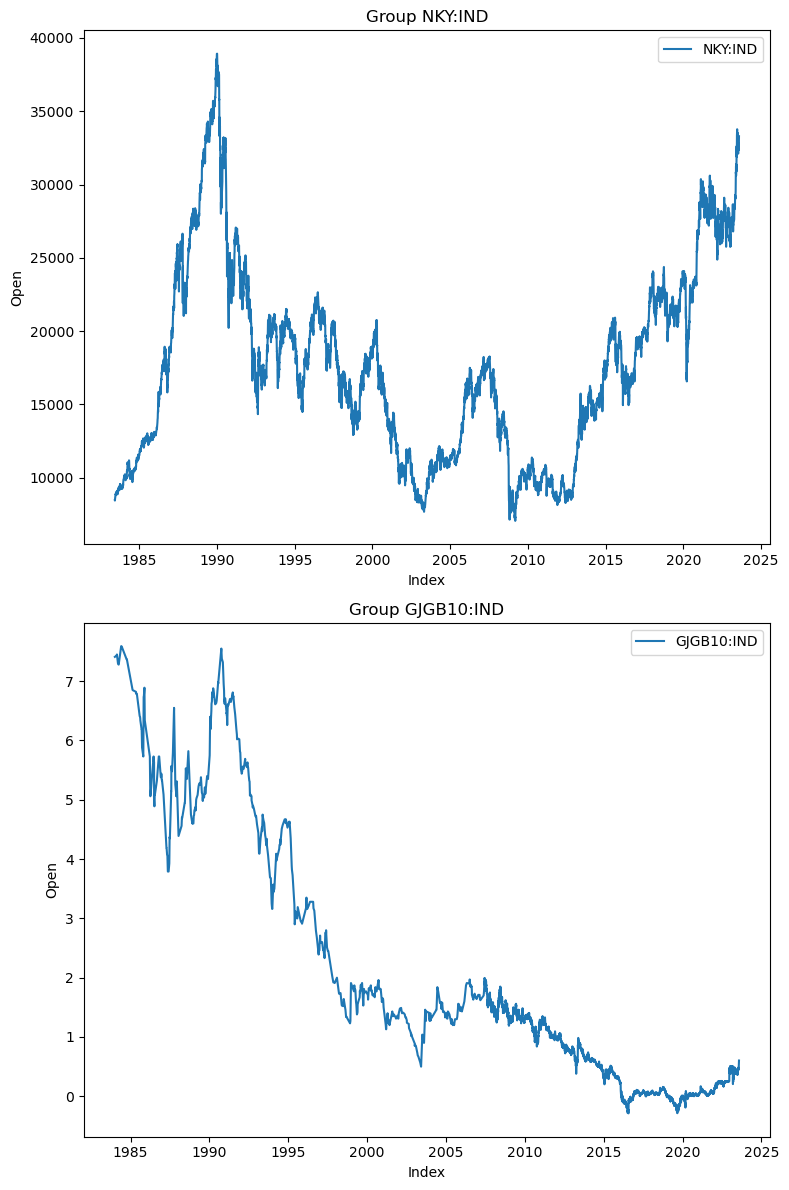

In [38]:
cdf.groupby('Symbol').size()

grouped = cdf.groupby('Symbol')

# Create a plot for each group
# Create a figure with two vertically stacked subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot data for each group in separate subplots
for name, group in grouped:
    ax = axes[0] if name == 'NKY:IND' else axes[1]
    ax.plot(group.index, group['Open'], label=name)
    ax.set_xlabel('Index')
    ax.set_ylabel('Open')
    ax.set_title(f'Group {name}')
    ax.legend()
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()
